<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/ProyectoProgADAP_263162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Factores de riesgo de la hipertension
## Grupo: B
## Autor: Alejandra Margarita Rivas Simental
## Matrícula: 263162
## Fecha: 9/10/2025

# **1. Introducción**

## - Descripción del problema: En México, más de 30 millones de personas padecen hipertensión arterial: Secretaría de Salud. Con este proyecto queremos predecir el riesgo que tiene una persona de desarrollar hipertensión de acuerdo a su estilo de vida.
## - Objetivo del análisis: Predecir el riesgo que tiene una persona de desarrollar hipertensión de acuerdo a su estilo de vida.
## - Fuente de datos: ¿De dónde provienen los datos? Utilizaremos un csv llamado Hypertension-dataset que sacamos de la página de Kaggle
 https://www.kaggle.com/datasets/sumedh1507/hypertension-dataset


# **2. Captura y Carga de Datos**

## - Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
###Fuente: Kaggle -  Hypertension Dataset, el archivo es un CSV
###Cantidad de Filas: 1985
###Cantidad de columnas: 11
###Variables incluidas:
* Edad
* Consumo de sal
* Nivel de estrés
* Historial de presión arterial
* Duración del sueño
* Indice de masa corporal (IMC)
* Medicación
* Historial Familiar
* Nivel de ejercicio
* Estado de fumador
* Diagnostico de hipertensión
## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)

### Para La carga de datos usamos la libreria de pandas y la cargamos desde drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


#**3.Transformación y Preprocesamiento - Data Wrangling**

## - Identificación de Tipos de Datos
## - Cantidad de Valores nulos
##- Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código

##Métricas de calidad de los datos
*	Completitud
*	Consistencia: tipos de datos correctos, formatos esperados.
*	Unicidad: duplicados.
* Validez: rangos adecuados.


In [8]:
print('Tipo de dato: ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
Tipo de dato:  None


In [4]:
print('Valores unicos en la columna BP_History: ', df['BP_History'].unique())
print('\nConteo de valores unicos en cada categoría',df['BP_History'].value_counts())

Valores unicos en la columna BP_History:  ['Normal' 'Hypertension' 'Prehypertension']

Conteo de valores unicos en cada categoría BP_History
Normal             796
Prehypertension    620
Hypertension       569
Name: count, dtype: int64


In [5]:
print('Valores unicos en la columna Medication: ', df['Medication'].unique())
print('\nConteo de valores unicos en cada categoría',df['Medication'].value_counts())

Valores unicos en la columna Medication:  [nan 'ACE Inhibitor' 'Other' 'Beta Blocker' 'Diuretic']

Conteo de valores unicos en cada categoría Medication
Beta Blocker     412
ACE Inhibitor    323
Diuretic         245
Other            206
Name: count, dtype: int64


In [12]:
duplicados = df.duplicated().sum()
print("Datos duplicados", duplicados)

Datos duplicados 0


In [7]:
completitud = df.isnull().sum()
total_records = len(df)
com_porcentaje = (1 - completitud/total_records) * 100
print('Verificacion de completitud')
print(completitud)
print("Porcentaje de completitud")
print(com_porcentaje)

Verificacion de completitud
Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64
Porcentaje de completitud
Age                 100.000000
Salt_Intake         100.000000
Stress_Score        100.000000
BP_History          100.000000
Sleep_Duration      100.000000
BMI                 100.000000
Medication           59.748111
Family_History      100.000000
Exercise_Level      100.000000
Smoking_Status      100.000000
Has_Hypertension    100.000000
dtype: float64


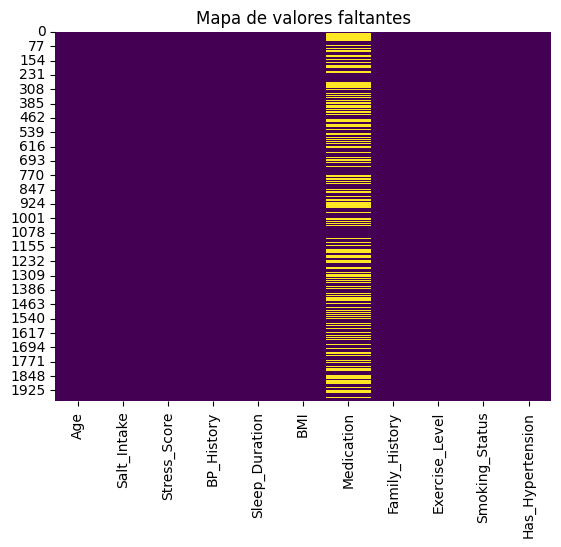

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de valores faltantes')
plt.show()

In [11]:
categorical_cols = ['BP_History', 'Medication', 'Family_History',
                    'Exercise_Level', 'Smoking_Status', 'Has_Hypertension']

for col in categorical_cols:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1985 non-null   int64   
 1   Salt_Intake       1985 non-null   float64 
 2   Stress_Score      1985 non-null   int64   
 3   BP_History        1985 non-null   category
 4   Sleep_Duration    1985 non-null   float64 
 5   BMI               1985 non-null   float64 
 6   Medication        1186 non-null   category
 7   Family_History    1985 non-null   category
 8   Exercise_Level    1985 non-null   category
 9   Smoking_Status    1985 non-null   category
 10  Has_Hypertension  1985 non-null   category
dtypes: category(6), float64(3), int64(2)
memory usage: 90.1 KB
None


In [13]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


# **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD


*   ¿Existe una relación entre el índice de masa corporal (IMC) y la presión arterial?
*   ¿Cuál es la distribución de edad de los pacientes y cómo se relaciona con el diagnóstico?
*   ¿Existe una correlación entre el historial familiar y el tener hipertensión?



## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas

# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

# **6. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados


# **7. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras